In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the cleaned & sorted dataset
df = pd.read_csv("../data/cleaned_pollutants_sorted.csv")



In [17]:
df.columns

Index(['State', 'City', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI',
       'CO AQI'],
      dtype='object')

In [18]:
df['State'].nunique()

47

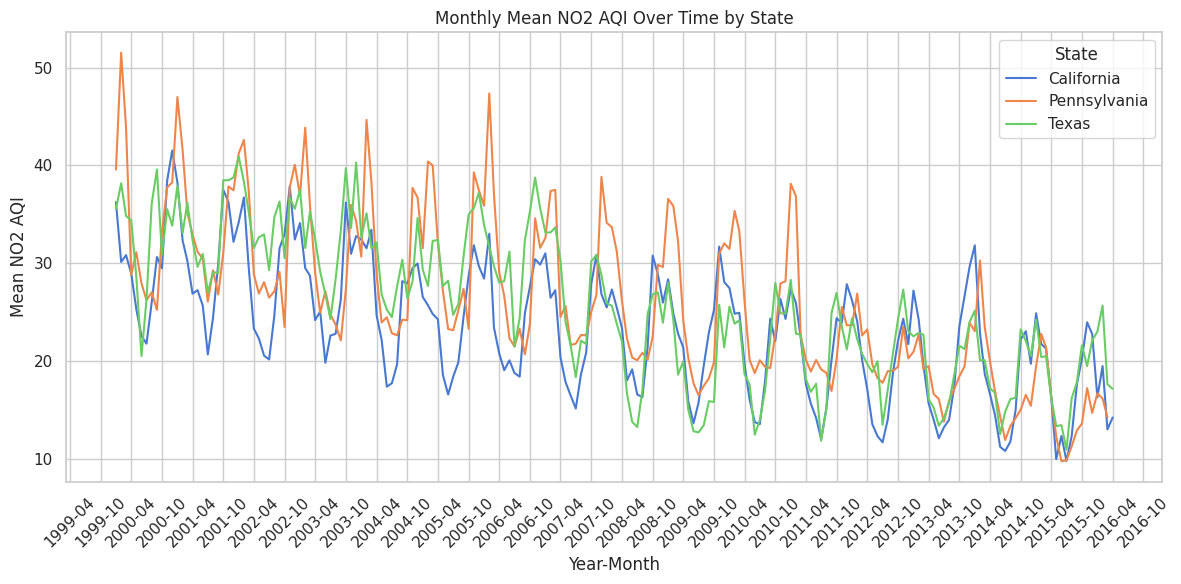

In [ ]:
# Make an explicit copy to avoid SettingWithCopyWarning
df_filtered = df[df["State"].isin(top_states)].copy()

df_filtered["Date Local"] = pd.to_datetime(df_filtered["Date Local"])
df_filtered["YearMonth"] = df_filtered["Date Local"].dt.to_period("M").astype(str)

pollutants = ["NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"]

for pollutant in pollutants:
    # Group by State and YearMonth, then take the mean for the pollutant
    df_monthly = (
        df_filtered
        .groupby(["State", "YearMonth"], as_index=False)[pollutant]
        .mean()
    )
    # Convert YearMonth to datetime for better axis formatting
    df_monthly["YearMonth"] = pd.to_datetime(df_monthly["YearMonth"])

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_monthly, x="YearMonth", y=pollutant, hue="State")
    plt.title(f"Monthly Mean {pollutant} Over Time by State")
    plt.ylabel(f"Mean {pollutant}")
    plt.xlabel("Year-Month")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.legend(title="State")
    plt.tight_layout()
    plt.show()